In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [2]:
# DATADIR = 'C:/Users/xpn381/Documents/data/PetImages' # windows
DATADIR = '/home/xpn381/data/PetImages'
PICKLEDIR = '/home/xpn381/data/pickles'

CATAGORIES = ['Dog', 'Cat']

# Grayscale:

# creating the dataset via a function:

In [3]:

def creat_training_data():
    
    training_data = []

    for category in CATAGORIES:
        path = os.path.join(DATADIR, category) # path to cat or dog dir
        class_num = CATAGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# one not three col
                IMG_SIZE = 100
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num]) # list with image and class
            except Exception as e:
                pass #print(e)
            
    return(training_data)

training_data = creat_training_data()

### Checking:

In [4]:
print(len(training_data))

24946


class{training_data[0][1]}


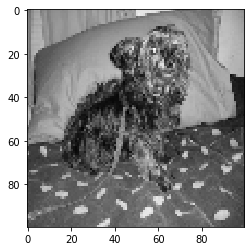

In [5]:
print('class{training_data[0][1]}')
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

### Shuffle the data

In [6]:
random.shuffle(training_data)

# Split in features and target:

In [7]:
X = []
y = []

IMG_SIZE = 100 # same as in function

for features, label in training_data:
    X.append(features)
    y.append(label)
    
# X must be numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # last 1 due to grayscale; 3 for colors
# -1 = 'any number given'

# Pickle features and target

In [8]:
pickle_out = open(PICKLEDIR+'/X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(PICKLEDIR+'/y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# pickle test:

In [9]:
pickle_in = open(PICKLEDIR+'/X.pickle','rb')
X_pt = pickle.load(pickle_in)

X_pt.shape
# corrosponds to (-1, IMG_SIZE, IMG_SIZE, 1)

(24946, 100, 100, 1)

In [10]:
pickle_in = open(PICKLEDIR+'/y.pickle','rb')
y_pt = pickle.load(pickle_in)

len(y_pt)
# just a binary list

24946